In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, shutil
import cv2
import matplotlib.image as mpimg
%matplotlib inline
plt.style.use('ggplot')



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Get the folder ID
folder_id = 'brain_tumor_dataset'

# Copy the folder to the Colab VM
!cp -r /content/drive/MyDrive/{folder_id} /content

Mounted at /content/drive


##Data Preprocessing

In [ ]:
folder = '/content/brain_tumor_dataset/yes/'
count = 1

for filename in os.listdir(folder):
    source = folder + filename
    destination = folder + "Y_" +str(count)+".jpg"
    os.rename(source, destination)
    count+=1
print("All files are renamed in the yes dir.")

All files are renamed in the yes dir.


In [ ]:
folder = '/content/brain_tumor_dataset/no/'
count = 1

for filename in os.listdir(folder):
    source = folder + filename
    destination = folder + "N_" +str(count)+".jpg"
    os.rename(source, destination)
    count+=1
print("All files are renamed in the no dir.")

All files are renamed in the no dir.


## EDA - Exploratory Data Analysis

In [ ]:
listyes = os.listdir("/content/brain_tumor_dataset/yes/")
number_files_yes = len(listyes)
print(number_files_yes)

listno = os.listdir("/content/brain_tumor_dataset/no/")
number_files_no = len(listno)
print(number_files_no)

155
98


**Data Visualisation**

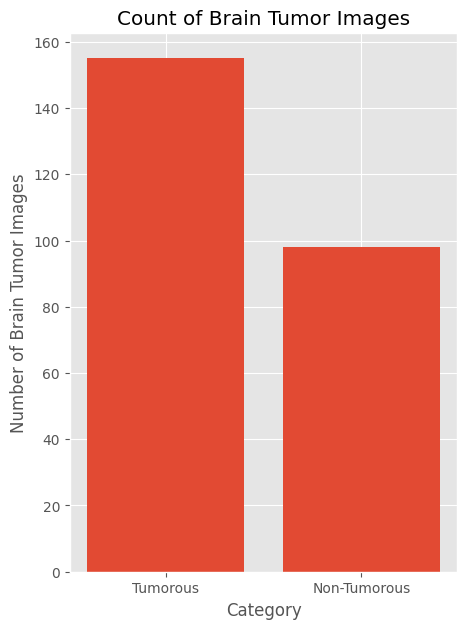

In [ ]:
import matplotlib.pyplot as plt

# Define data
data = {'Tumorous': number_files_yes, 'Non-Tumorous': number_files_no}

fig = plt.figure(figsize=(5,7))

# Create a bar chart
plt.bar(data.keys(), data.values())

# Add labels and title
plt.xlabel("Category")
plt.ylabel("Number of Brain Tumor Images")
plt.title("Count of Brain Tumor Images")

# Show the chart
plt.show()

**So we have unbalanced data**

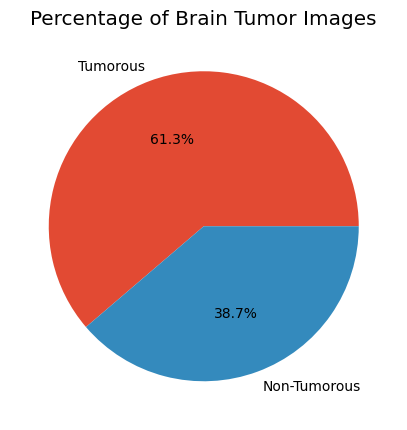

In [ ]:
import matplotlib.pyplot as plt

# Calculate the total number of images
total_images = number_files_yes + number_files_no


# Calculate the percentage of each category
percentage_yes = (number_files_yes / total_images) * 100
percentage_no = (number_files_no / total_images) * 100

# Define data
data = {'Tumorous': percentage_yes, 'Non-Tumorous': percentage_no}

fig = plt.figure(figsize=(5,7))

# Create a pie chart
plt.pie(data.values(), labels=data.keys(), autopct="%1.1f%%")

# Add title
plt.title("Percentage of Brain Tumor Images")

# Show the chart
plt.show()


## Data Augmentation

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau


**Image Generation**

In [ ]:
def timing(sec_elapsed):
    h = int(sec_elapsed / (60*60))
    m = int(sec_elapsed % (60*60) / 60)
    s = sec_elapsed % 60
    return f"{h}:{m}:{s}"

**The augmented_data function is used for image augmentation, which is a technique used to artificially expand the size of a training dataset by creating modified versions of existing images. This helps to improve the performance and generalization of machine learning models by exposing them to a wider variety of data.**

In [ ]:
def augmented_data(file_dir, n_generated_samples, save_to_dir):
   #Create an ImageDataGenerator object:
    data_gen = ImageDataGenerator(rotation_range=10,
                      width_shift_range=0.1,
                      height_shift_range=0.1,
                      shear_range=0.1,
                      brightness_range=(0.3, 1.0),
                      horizontal_flip=True,
                      vertical_flip=True,
                      fill_mode='nearest')

    #Iterate through the images in the directory:
    for filename in os.listdir(file_dir):
        image = cv2.imread(file_dir + '/' + filename)
        image = image.reshape((1,) + image.shape)
        save_prefix = 'aug_' + filename[:-4]
        i=0
        for batch in data_gen.flow(x = image, batch_size = 1, save_to_dir = save_to_dir, save_prefix = save_prefix, save_format = "jpg"):
            i+=1
            if i>n_generated_samples:
                break

**Specify the folder for generated images**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Get the folder ID
folder_id = 'augmented_data'

# Copy the folder to the Colab VM
!cp -r /content/drive/MyDrive/{folder_id} /content

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import time
start_time = time.time()

augmented_data(file_dir="/content/brain_tumor_dataset/yes/", n_generated_samples=6, save_to_dir='/content/augmented_data/yes')
augmented_data(file_dir="/content/brain_tumor_dataset/no/", n_generated_samples=9, save_to_dir='/content/augmented_data/no')

end_time = time.time()
execution_time = end_time - start_time
print(timing(execution_time))

0:1:33.59628415107727


In [ ]:
def data_summary(main_path):
    yes_path = "/content/augmented_data/yes"
    no_path = "/content/augmented_data/no"

    n_pos = len(os.listdir(yes_path))
    n_neg = len(os.listdir(no_path))

    n = (n_pos + n_neg)

    pos_per = (n_pos*100)/n
    neg_per = (n_neg*100)/n

    print(f"Number of sample: {n}")
    print(f"{n_pos} Number of positive sample in percentage: {pos_per}%")
    print(f"{n_neg} Number of negative sample in percentage: {neg_per}%")

In [ ]:
aug_data_path = "/content/augmented_data/"
data_summary(aug_data_path)

Number of sample: 2064
1085 Number of positive sample in percentage: 52.56782945736434%
979 Number of negative sample in percentage: 47.43217054263566%


In [ ]:
#Save the data after augmentation

!cp -r /content/augmented_data /content/drive/MyDrive


**Data Visualization after augmentation**

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

# Set the path to the augmented data folder in your Drive
aug_data = '/content/drive/MyDrive/augmented_data'
aug_data_yes = '/content/drive/MyDrive/augmented_data/yes'
aug_data_no = '/content/drive/MyDrive/augmented_data/no'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
listyes = os.listdir(aug_data_yes)
number_files_yes = len(listyes)
#print(number_files_yes)

listno = os.listdir(aug_data_no)
number_files_no = len(listno)
#print(number_files_no)

1085
979


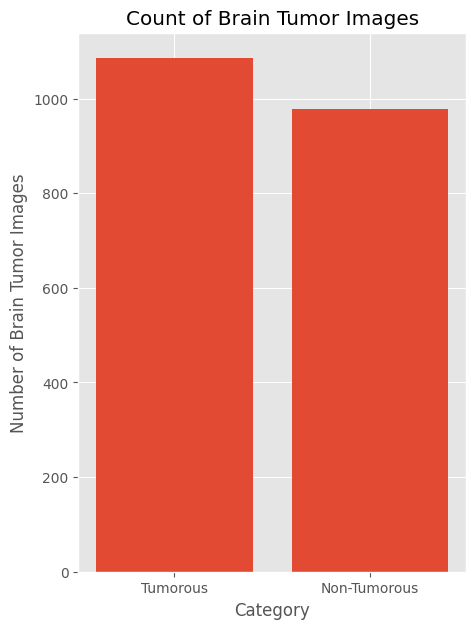

In [ ]:
import matplotlib.pyplot as plt

# Define data
data = {'Tumorous': number_files_yes, 'Non-Tumorous': number_files_no}

fig = plt.figure(figsize=(5,7))

# Create a bar chart
plt.bar(data.keys(), data.values())

# Add labels and title
plt.xlabel("Category")
plt.ylabel("Number of Brain Tumor Images")
plt.title("Count of Brain Tumor Images")

# Show the chart
plt.show()

**So our dataset is right now quite balanced**

The original dataset had 155 images of tumorous brains and 98 images of non-tumorous brains. After augmentation, there are now 1084 images of tumorous brains and 980 images of non-tumorous brains. This is a more balanced dataset, as the number of images in each category is more similar.

A balanced dataset is important for training a machine learning model because it ensures that the model is not biased towards one category or another. This can lead to better performance and generalization of the model.

# Images Preprocessing

**Steps :**

**- Convert BGR to GRAY:** Convert the image from color (BGR) to grayscale.

Many image processing algorithms, including thresholding, work better or are simpler when applied to grayscale images.

**- Gaussian Blur:** Reduces noise and helps in smoother contour detection.

**- Threshold:** Converts the image to binary, making it easier to detect objects.

**- Dilate:**  Increases the object area, helps in closing small gaps and connecting disjoint parts of the objects.

**- Find Contours:** Detects the boundaries of objects in the binary image.

This pipeline is commonly used for tasks such as object detection, shape analysis, and image segmentation.

**Thresholding** is a technique used in image processing to create binary images from grayscale images. The goal is to convert an image into a binary format, where the pixels are either black or white, simplifying the analysis of the image.

In [ ]:
import imutils
def crop_brain_tumor(image, plot=False):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (5,5), 0)

    thres = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
    thres =cv2.erode(thres, None, iterations = 2)
    thres = cv2.dilate(thres, None, iterations = 2)

    cnts = cv2.findContours(thres.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key = cv2.contourArea)

    extLeft = tuple(c[c[:,:,0].argmin()][0])
    extRight = tuple(c[c[:,:,0].argmax()][0])
    extTop = tuple(c[c[:,:,1].argmin()][0])
    extBot = tuple(c[c[:,:,1].argmax()][0])

    new_image = image[extTop[1]:extBot[1], extLeft[0]:extRight[0]]

    if plot:
        plt.figure()
        plt.subplot(1, 2, 1)
        plt.imshow(image)

        plt.tick_params(axis='both', which='both',
                        top=False, bottom=False, left=False, right=False,
                        labelbottom=False, labeltop=False, labelleft=False, labelright=False)

        plt.title('Original Image')

        plt.subplot(1, 2, 2)
        plt.imshow(new_image)

        plt.tick_params(axis='both', which='both',
                        top=False, bottom=False, left=False, right=False,
                        labelbottom=False, labeltop=False, labelleft=False, labelright=False)

        plt.title('Cropped Image')
        plt.show()
    return new_image

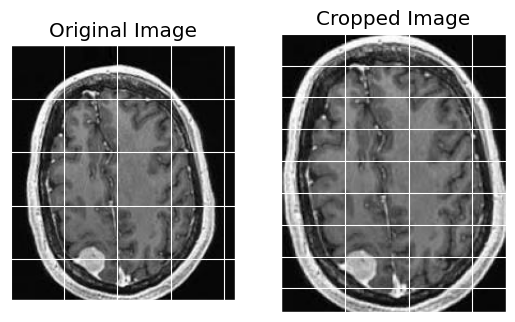

In [ ]:
ex_img = cv2.imread(aug_data_yes + '/aug_Y_100_0_7621.jpg')
ex_new_img = crop_brain_tumor(ex_img, True)


## **Image Loading**
The `load_data` function : to load and prepare the image data for model training.

In [ ]:
from sklearn.utils import shuffle

def load_data(dir_list, image_size):
    X=[] # an empty list to store the image data
    y=[] # an empty list to store the labels (1 for tumorous, 0 for non-tumorous)

    image_width, image_height=image_size

    for directory in dir_list:
        for filename in os.listdir(directory):
            image = cv2.imread(directory + '/' + filename)
            image = crop_brain_tumor(image, plot=False) # Crop the image to focus on the brain tumor region
            image = cv2.resize(image, dsize=(image_width, image_height), interpolation = cv2.INTER_CUBIC) # Resize the image to a consistent size
            image = image/255.00 # Normalize pixel values to be between 0 and 1

            X.append(image)

#This code segment is a simple way to automatically label your images based on their directory structure. It assumes a convention where directories containing tumorous images end with "yes" and those with non-tumorous images end with "no". By appending 1 or 0 to the y list, you create a set of labels corresponding to your image data, which is essential for training a classification model.

            if directory[-3:] == "yes":
                y.append(1) # Append 1 for tumorous images
            else:
                y.append(0) # Append 0 for non-tumorous images

    X=np.array(X)
    y=np.array(y)

    X,y = shuffle(X,y) # Shuffle the data and labels to randomize the order of elements in both arrays X and y simultaneously.

    print(f"Number of example is : {len(X)}")
    print(f"X SHAPE is : {X.shape}")
    print(f"y SHAPE is : {y.shape}")
    return X,y

In [ ]:
IMAGE_WIDTH, IMAGE_HEIGHT = (240,240)

X,y = load_data([aug_data_yes, aug_data_no], (IMAGE_WIDTH, IMAGE_HEIGHT))

Number of example is : 2064
X SHAPE is : (2064, 240, 240, 3)
y SHAPE is : (2064,)


The X array contains 2064 images, each with a resolution of 240x240 pixels and encoded in RGB color format.

3 color channels, typically representing Red, Green, and Blue (RGB).

In [ ]:
def plot_sample_images(X, y, n=50):

    for label in [0,1]:
        images = X[np.argwhere(y == label)]
        n_images = images[:n]

        columns_n = 10
        rows_n = int(n/ columns_n)

        plt.figure(figsize=(20, 10))

        i = 1
        for image in n_images:
            plt.subplot(rows_n, columns_n, i)
            plt.imshow(image[0])

            plt.tick_params(axis='both', which='both',
                            top=False, bottom=False, left=False, right=False,
                            labelbottom=False, labeltop=False, labelleft=False,
                            labelright=False)

            i += 1

        label_to_str = lambda label: "Yes" if label == 1 else "No"
        plt.suptitle(f" 'Brain Tumor: {label_to_str(label)}' ")
        plt.show()

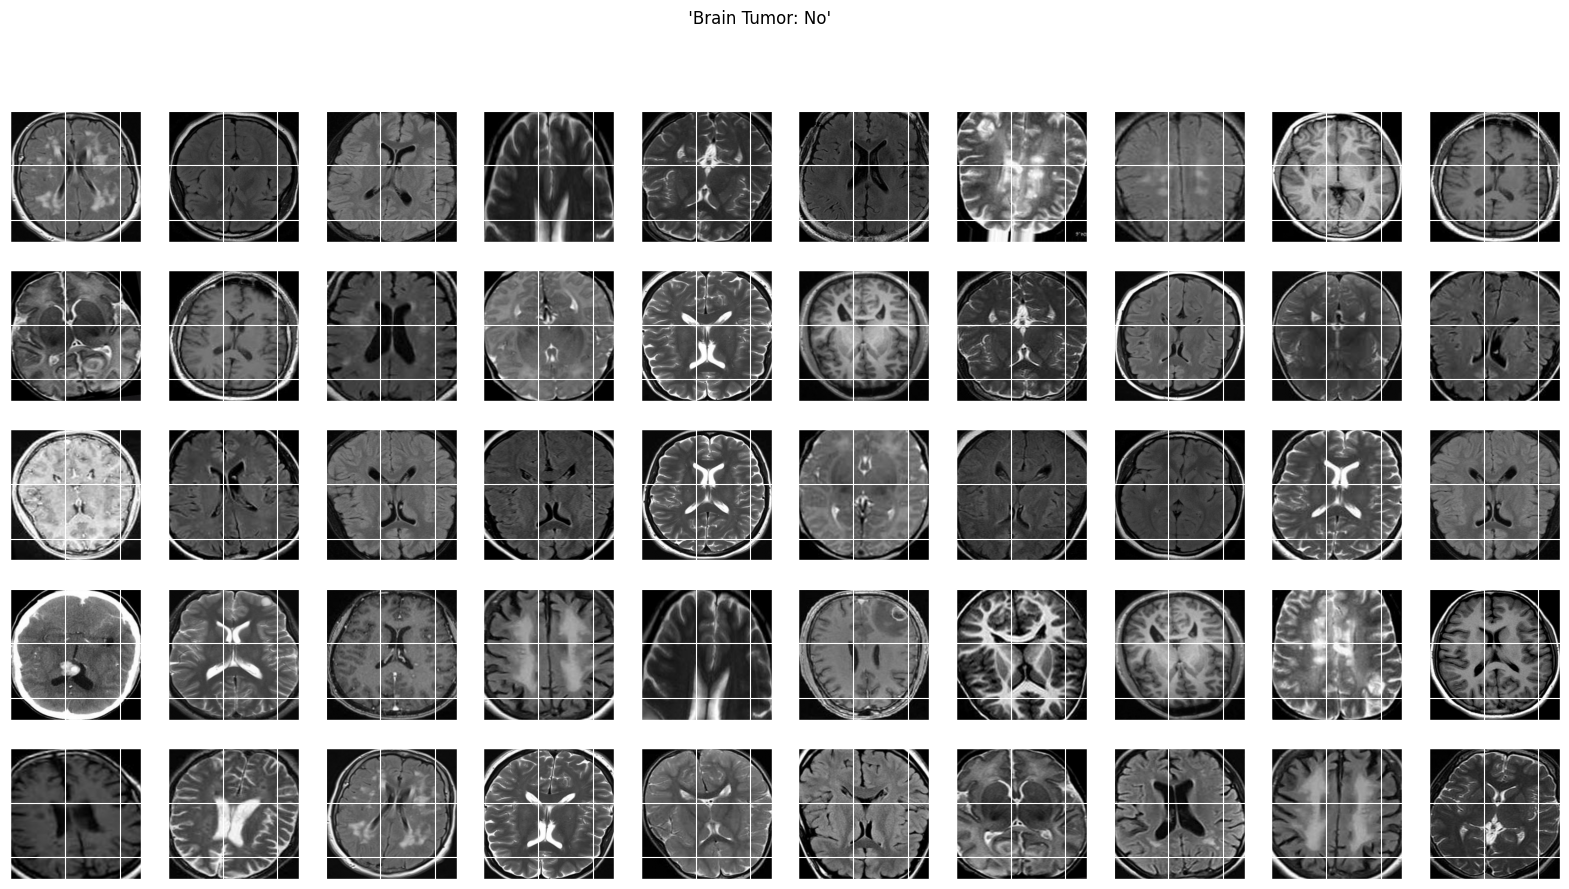

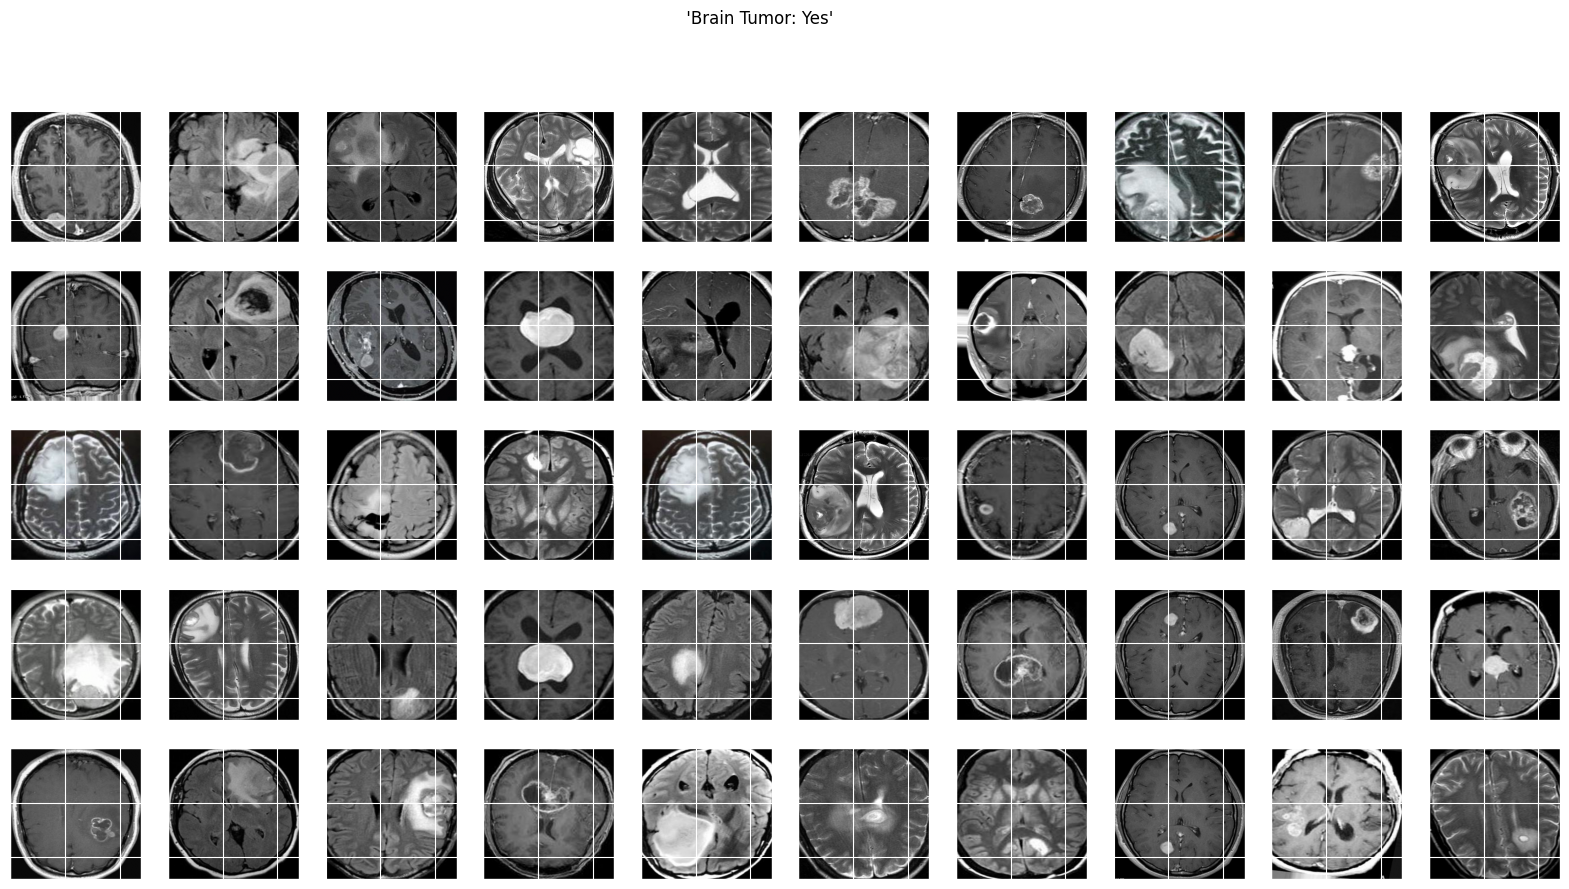

In [ ]:
plot_sample_images(X,y)

## **Data Spliting**
**Train , Test , Validation Set**

  **80%     10%        10%**



In this case we will create our data

In [ ]:
original_dataset_tumorous = aug_data_yes
original_dataset_non_tumorous = aug_data_no

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Get the folder ID
folder_id = 'tumorous_and_nontumorous'

# Copy the folder to the Colab VM
!cp -r /content/drive/MyDrive/{folder_id} /content

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
files = os.listdir(aug_data_yes)
fnames = []
for i in range(0,759):
    fnames.append(files[i])
for fname in fnames:
    src = os.path.join(original_dataset_tumorous, fname)
    dst = os.path.join('/content/tumorous_and_nontumorous/train/tumorous', fname)
    shutil.copyfile(src, dst)


This code segment is responsible for splitting the dataset of tumorous brain images into a training set.

It moves 759 images from the 'augmented_data/yes/' directory (which contains augmented images of tumorous brains)
to a new directory '/content/tumorous_and_nontumorous/train/tumorous'.

This is a crucial step in preparing data for machine learning, as it separates a portion of the data for training the model,
leaving the rest for validation and testing to evaluate the model's performance on unseen data.

In [ ]:
files = os.listdir(aug_data_yes)
fnames = []
for i in range(759,922):
    fnames.append(files[i])
for fname in fnames:
    src = os.path.join(original_dataset_tumorous, fname)
    dst = os.path.join('/content/tumorous_and_nontumorous/test/tumorous', fname)
    shutil.copyfile(src, dst)

In [ ]:
files = os.listdir(aug_data_yes)
fnames = []
for i in range(922,1085):
    fnames.append(files[i])
for fname in fnames:
    src = os.path.join(original_dataset_tumorous, fname)
    dst = os.path.join('/content/tumorous_and_nontumorous/valid/tumorous', fname)
    shutil.copyfile(src, dst)

**Same thing for NO**

In [ ]:
files = os.listdir(aug_data_no)
fnames = []
for i in range(0,686):
    fnames.append(files[i])
for fname in fnames:
    src = os.path.join(original_dataset_non_tumorous, fname)
    dst = os.path.join('/content/tumorous_and_nontumorous/train/nontumorous', fname)
    shutil.copyfile(src, dst)

In [ ]:
files = os.listdir(aug_data_no)
fnames = []
for i in range(686,833):
    fnames.append(files[i])
for fname in fnames:
    src = os.path.join(original_dataset_non_tumorous, fname)
    dst = os.path.join('/content/tumorous_and_nontumorous/test/nontumorous', fname)
    shutil.copyfile(src, dst)

In [ ]:
files = os.listdir(aug_data_no)
fnames = []
for i in range(833,979):
    fnames.append(files[i])
for fname in fnames:
    src = os.path.join(original_dataset_non_tumorous, fname)
    dst = os.path.join('/content/tumorous_and_nontumorous/valid/nontumorous', fname)
    shutil.copyfile(src, dst)

In [ ]:
!cp -r /content/tumorous_and_nontumorous /content/drive/MyDrive

**------>  Next Notebook**